In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line Plots

<Axes: >

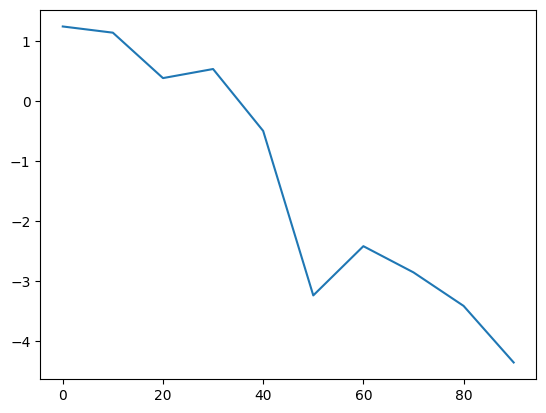

In [3]:
# Series and DataFrame each have a plot attribute for making some basic plot types. 
# By default, plot() makes line plots
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though you
can disable this by passing use_index=False. The x-axis ticks and limits can be
adjusted with the xticks and xlim options, and y-axis respectively with yticks and
ylim. See Table 9-3 for a full listing of plot options. I’ll comment on a few more of
them throughout this section and leave the rest to you to explore.

Most of pandas’s plotting methods accept an optional ax parameter, which can be a
matplotlib subplot object. This gives you more flexible placement of subplots in a grid
layout.
DataFrame’s plot method plots each of its columns as a different line on the same
subplot, creating a legend automatically :

<Axes: >

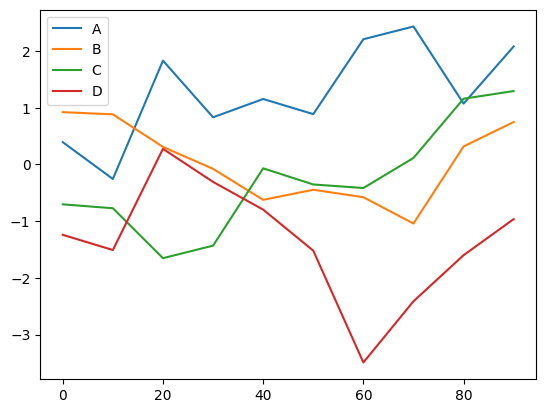

In [4]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

The plot attribute contains a “family” of methods for different plot types. For exam‐
ple, df.plot() is equivalent to df.plot.line(). We’ll explore some of these methods
next.

Additional keyword arguments to plot are passed through to the
respective matplotlib plotting function, so you can further custom‐
ize these plots by learning more about the matplotlib API.

__Table 9-3. Series.plot method arguments__

Argument Description

label           Label for plot legend

ax              matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot

style           Style string, like 'ko--', to be passed to matplotlib

alpha           The plot fill opacity (from 0 to 1)

kind            Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'

logy            Use logarithmic scaling on the y-axis

use_index       Use the object index for tick labels

rot             Rotation of tick labels (0 through 360)

xticks          Values to use for x-axis ticks

yticks          Values to use for y-axis ticks

xlim            x-axis limits (e.g., [0, 10])

ylim            y-axis limits

grid            Display axis grid (on by default)

DataFrame has a number of options allowing some flexibility with how the columns
are handled; for example, whether to plot them all on the same subplot or to create
separate subplots. See Table 9-4 for more on these.

__Table 9-4. DataFrame-specific plot arguments__

Argument            Description

subplots            Plot each DataFrame column in a separate subplot

sharex              If subplots=True, share the same x-axis, linking ticks and limits

sharey              If subplots=True, share the same y-axis

figsize             Size of figure to create as tuple

title               Plot title as string

legend              Add a subplot legend (True by default)

sort_columns        Plot columns in alphabetical order; by default uses existing column order

## Bar Plots

<Axes: >

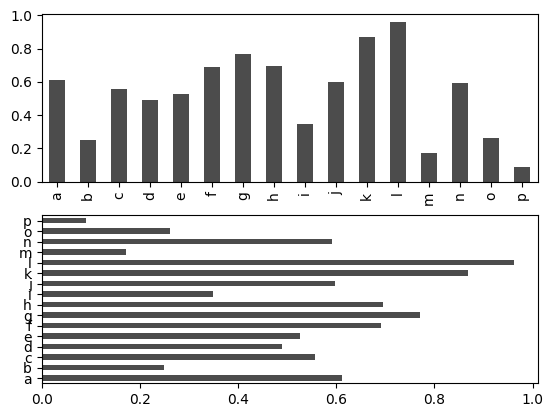

In [5]:
# The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively.
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

# The options color='k' and alpha=0.7 set the color of the plots to black 
# and use partial transparency on the filling.

<Axes: >

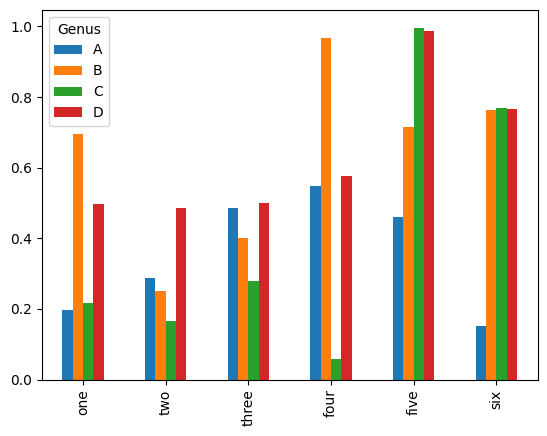

In [7]:
# With a DataFrame, bar plots group the values in each row together in a group in bars,
# side by side, for each value.
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()
# Note that the name “Genus” on the DataFrame’s columns is used to title the legend.

<Axes: >

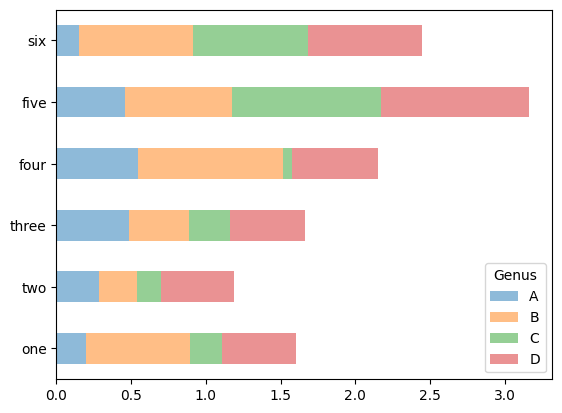

In [8]:
# We create stacked bar plots from a DataFrame by passing stacked=True, 
# resulting in the value in each row being stacked together
df.plot.barh(stacked=True, alpha=0.5)

A useful recipe for bar plots is to visualize a Series’s value frequency
using value_counts: s.value_counts().plot.bar().

Returning to the tipping dataset used earlier in the book, suppose we wanted to make
a stacked bar plot showing the percentage of data points for each party size on each
day. I load the data using read_csv and make a cross-tabulation by day and party size:

In [18]:
tips = pd.read_csv(r'D:\python build app\laptop-victus\data\panda\Data-Aggregation-and-Group-Operations\tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [20]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<Axes: xlabel='day'>

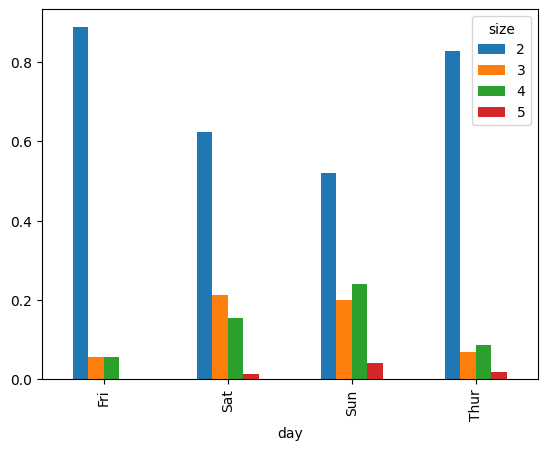

In [21]:
party_pcts.plot.bar()

So you can see that party sizes appear to increase on the weekend in this dataset.

With data that requires aggregation or summarization before making a plot, using the
seaborn package can make things much simpler. Let’s look now at the tipping per‐
centage by day with seaborn (see Figure 9-19 for the resulting plot):

In [22]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

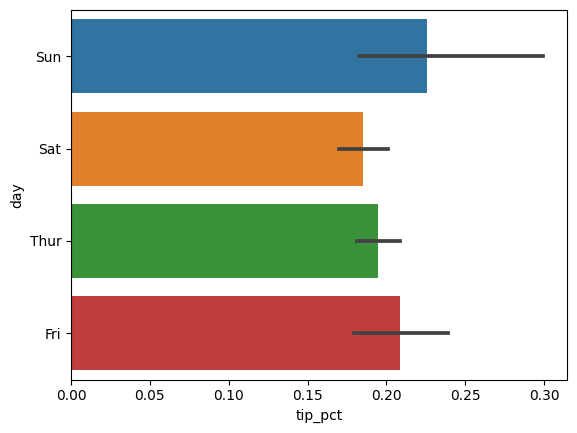

In [23]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in seaborn take a data argument, which can be a pandas Data‐
Frame. The other arguments refer to column names. Because there are multiple
observations for each value in the day, the bars are the average value of tip_pct. The
black lines drawn on the bars represent the 95% confidence interval (this can be con‐
figured through optional arguments).

seaborn.barplot has a hue option that enables us to split by an additional categorical
value

<Axes: xlabel='tip_pct', ylabel='day'>

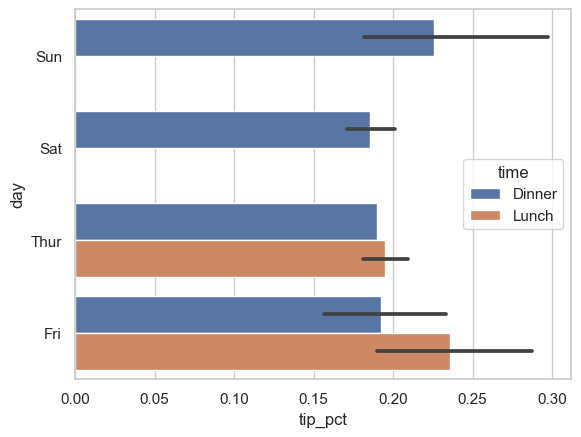

In [27]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Notice that seaborn has automatically changed the aesthetics of plots: the default
color palette, plot background, and grid line colors. You can switch between different
plot appearances using seaborn.set:

In [25]:
sns.set(style="whitegrid")

## Histograms and Density Plots

<Axes: ylabel='Frequency'>

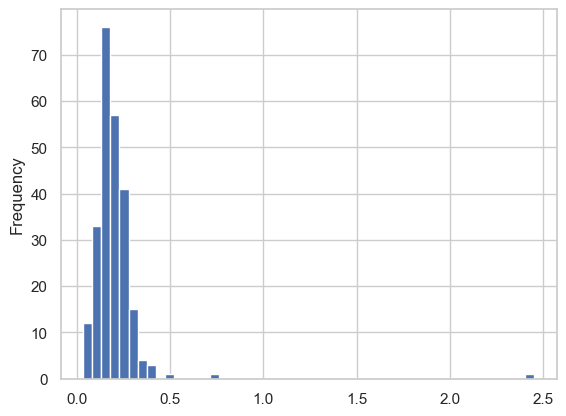

In [28]:
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a density plot, which is formed by computing an estimate of a
continuous probability distribution that might have generated the observed data. The
usual procedure is to approximate this distribution as a mixture of “kernels”—that is,
simpler distributions like the normal distribution. Thus, density plots are also known
as kernel density estimate (KDE) plots. Using plot.kde makes a density plot using
the conventional mixture-of-normals estimate

<Axes: ylabel='Density'>

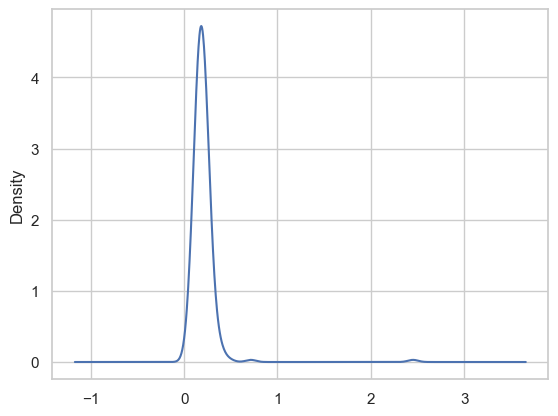

In [29]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its distplot
method, which can plot both a histogram and a continuous density estimate simulta‐
neously. As an example, consider a bimodal distribution consisting of draws from
two different standard normal distributions

C:\Users\WORK\AppData\Local\Temp\ipykernel_43996\1244689278.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color='k')


<Axes: ylabel='Density'>

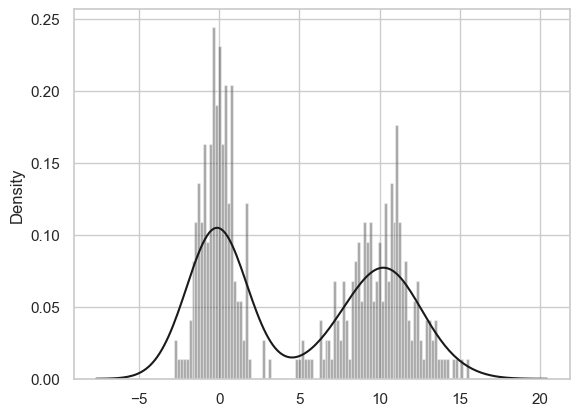

In [30]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

## Scatter or Point Plots

In [31]:
macro = pd.read_csv('D:\python build app\laptop-victus\data\panda\Data-Wrangling-Join-Combine-Reshape\macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [33]:
# We can then use seaborn’s regplot method, which makes a scatter plot and fits a linear regression line
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

TypeError: regplot() got multiple values for argument 'data'

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a
plot from scratch is a bit of work, so seaborn has a convenient pairplot function,
which supports placing histograms or density estimates of each variable along the
diagonal

d:\python build app\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


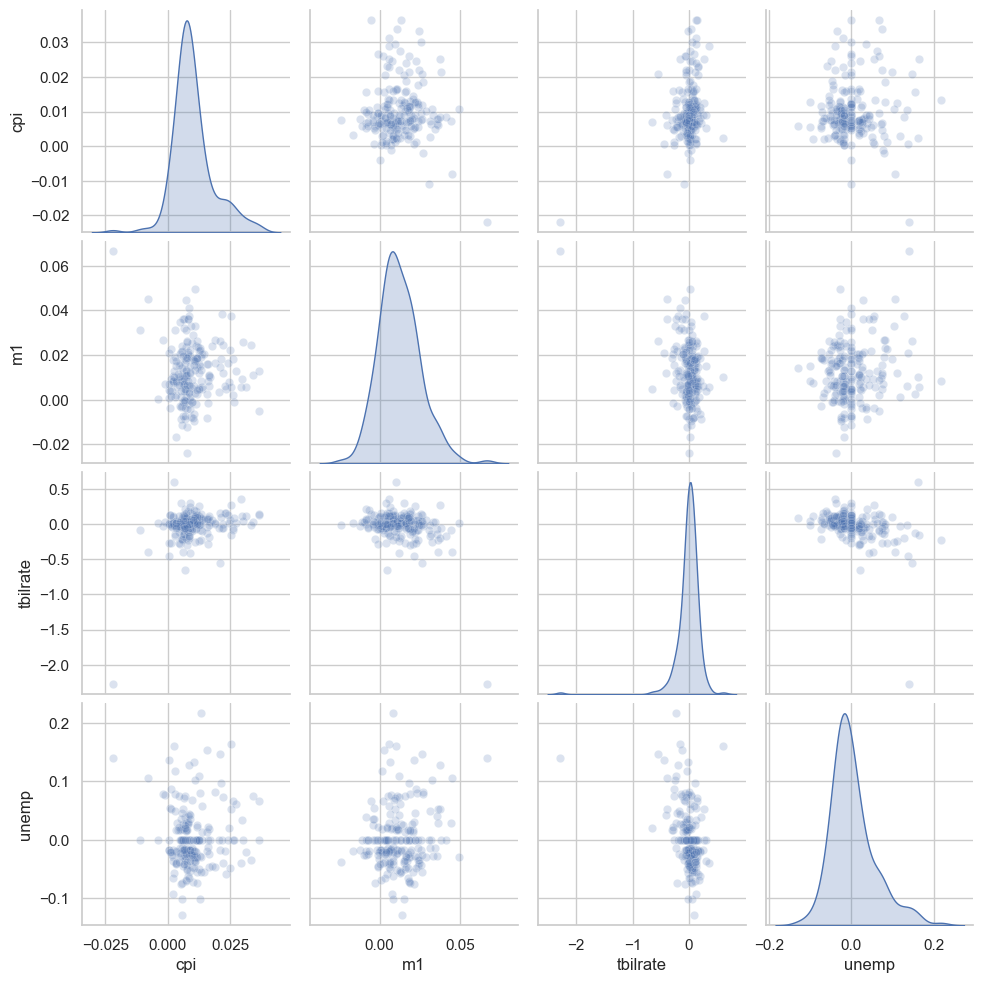

In [35]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

You may notice the plot_kws argument. This enables us to pass down configuration
options to the individual plotting calls on the off-diagonal elements. Check out the
seaborn.pairplot docstring for more granular configuration options.

## Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to vis‐
ualize data with many categorical variables is to use a facet grid. Seaborn has a useful
built-in function factorplot that simplifies making many kinds of faceted plots

d:\python build app\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


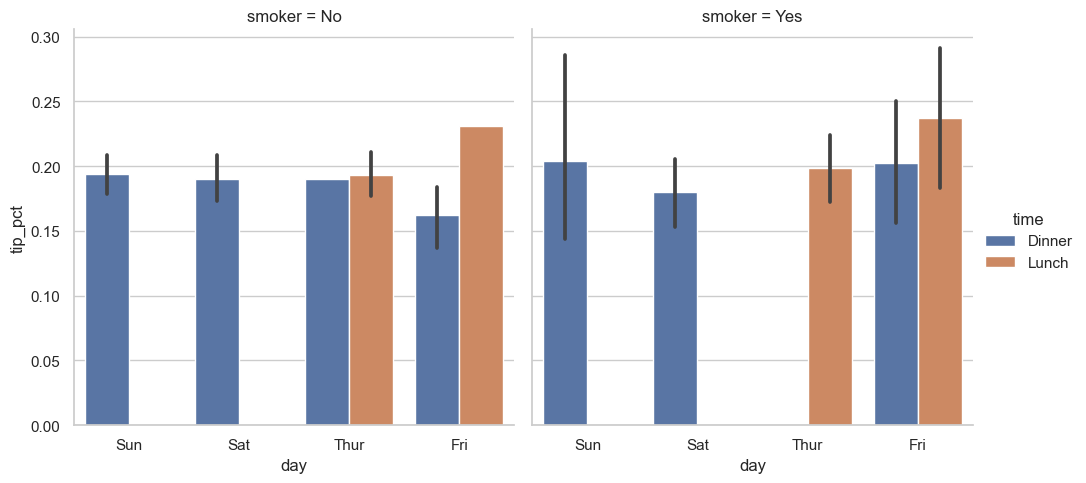

In [38]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

# sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',kind='bar', data=tips[tips.tip_pct < 1])
# In the latest command factorplot is replaced with catplot. 

Instead of grouping by 'time' by different bar colors within a facet, we can also
expand the facet grid by adding one row per time value

d:\python build app\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


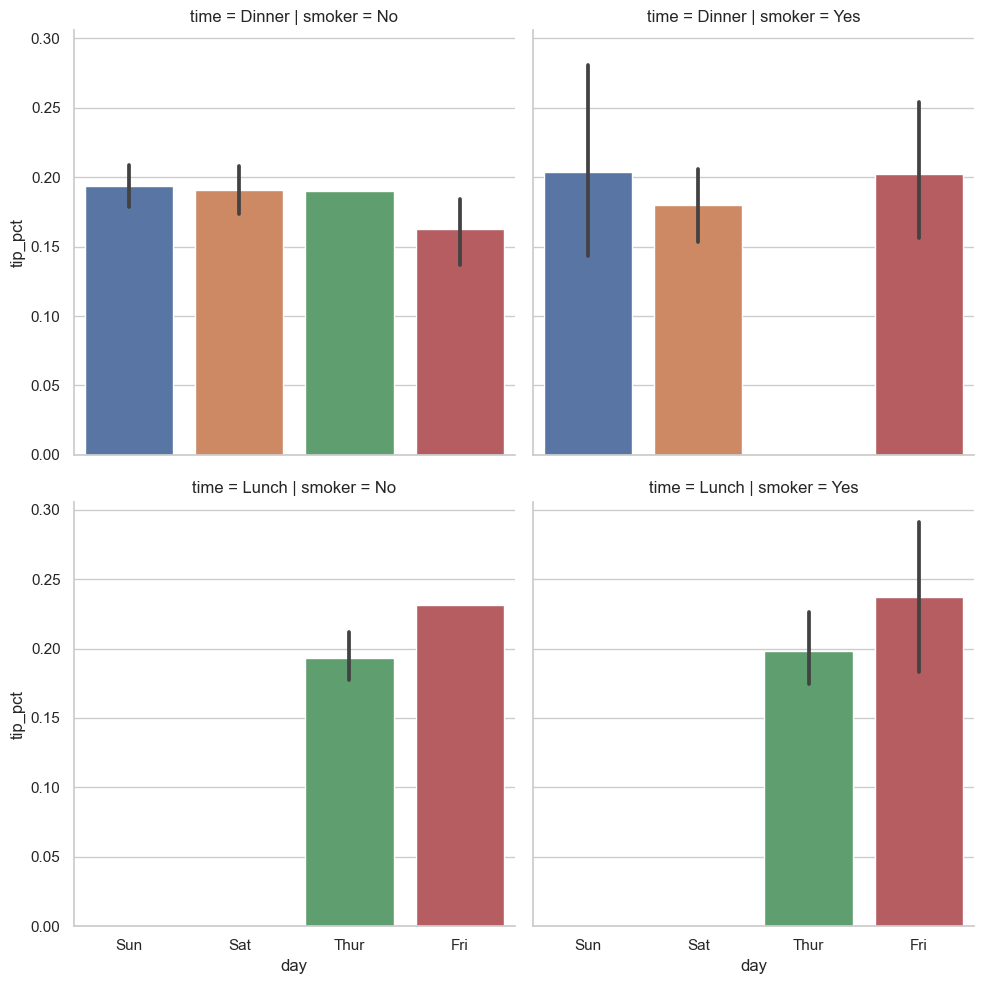

In [39]:
sns.catplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

factorplot supports other plot types that may be useful depending on what you are
trying to display. For example, box plots (which show the median, quartiles, and out‐
liers) can be an effective visualization type

d:\python build app\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


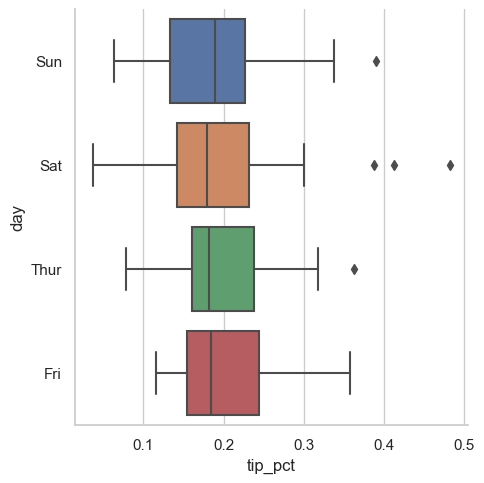

In [40]:
sns.catplot(x='tip_pct', y='day', kind='box',data=tips[tips.tip_pct < 0.5])

You can create your own facet grid plots using the more general seaborn.FacetGrid
class.